In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import geopandas as gpd
from trajectories_clustering import TrajectoryClustering
from trajectory_visualizer_matplot import TrajectoryVisualizerMatplot

### Selecionando as trajetorias

In [3]:
df = pd.read_csv('./data/input/gps_logs.csv')
df['trip'].value_counts()

1243    2695
1809    2411
1558    2125
1167    2053
1319    1959
        ... 
977      364
1505     359
1428     358
722      355
467      230
Name: trip, Length: 169, dtype: int64

In [4]:
trajetorias = []
trips_ids = []
for trip_id, frame in df.groupby('trip'):
    rota = list(zip(frame['lat'], frame['lon']))
    trajetorias.append(rota)
    trips_ids.append(trip_id)

In [127]:
import folium

print(trips_ids[1])
# cluster A = 0, 2
# cluster B = 1, 4, 7, 8
# cluster C = 5, 28, 30, 35, 40
# cluster D = 6, 9, 10, 11, 12
rota = trajetorias[0]
mapa = folium.Map(location=rota[0], zoom_start=11)

for ponto in rota:
    folium.Circle(ponto, fill=True, radius=4, color='blue', fill_color='blue').add_to(mapa)

mapa

54


In [102]:
# cluster A = 0, 2
# cluster B = 1, 4, 7, 8
# cluster C = 5, 28, 30, 35, 40
# cluster D = 6, 9, 10, 11, 12
trajetorias_s = [trajetorias[i] for i in [0,2,1,4,7,8,5,28,30,35,40,6,9,10,11,12]]
for t in trajetorias_s:
    print(len(t))

985
954
832
1007
584
729
528
541
619
478
571
1118
638
787
668
704


### Steve clustering

In [103]:
trajectories = [np.array(x) for x in trajetorias_s]

In [104]:
trajectories_xy = TrajectoryClustering.convert_lat_lon_to_xy(trajectories)

In [105]:
trajectories_reduced = [TrajectoryClustering.reduce_polyline_points_by_rdp(p) for p in trajectories_xy]

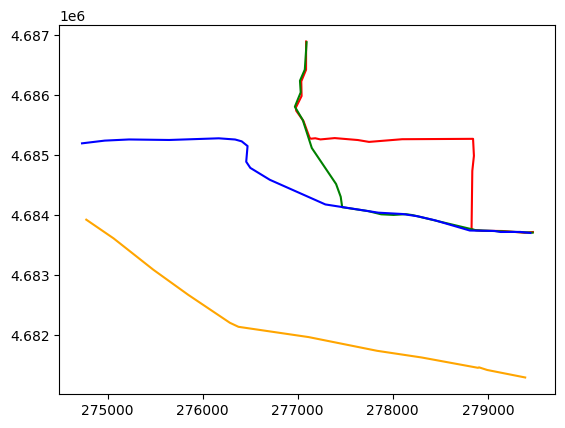

In [106]:
trajA = trajectories_reduced[0]
trajB = trajectories_reduced[3]
trajC = trajectories_reduced[6]
trajD = trajectories_reduced[14]
plt.plot(trajA[:,0], trajA[:,1], 'r')
plt.plot(trajB[:,0], trajB[:,1], 'g')
plt.plot(trajC[:,0], trajC[:,1], 'b')
plt.plot(trajD[:,0], trajD[:,1], 'orange')

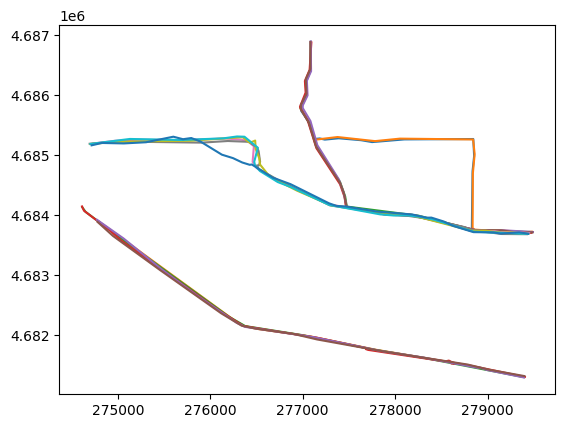

In [107]:
for t in trajectories_reduced:
    plt.plot(t[:,0], t[:,1])

In [108]:
data = [[len(t), len(trajectories_reduced[i])] for i, t in enumerate(trajectories)]
red = pd.DataFrame(data=data, columns=["original data points", "after RDP"])
red.index.name = "traj #"
red.head(16)

,original data points,after RDP
traj #,,
0,985,24
1,954,21
2,832,13
3,1007,17
4,584,17
5,729,17
6,528,21
7,541,20
8,619,20


In [109]:
dist_mat_reduced = TrajectoryClustering.compute_distance_matrix(trajectories_reduced)

In [122]:
labels = TrajectoryClustering.clustering_by_dbscan(dist_mat_reduced, eps=1000)
labels
# Nesse caso, o valor de eps entre 800 e 1300 encontra as 4 rotas principais
# Com 1500 já "funde" as duas rotas mais de cima

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

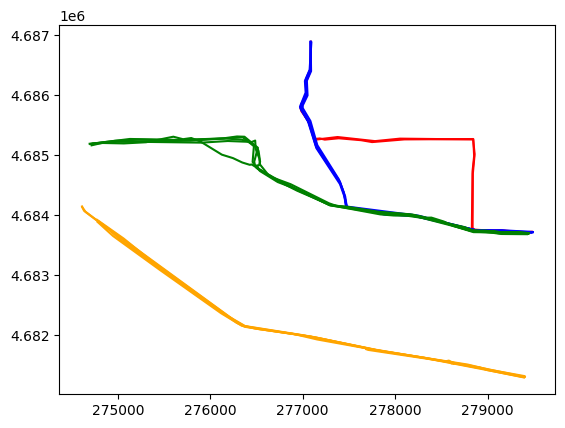

In [123]:
colors = {0: 'red', 1: 'blue', 2: 'green', 3:'orange', 4:'black'}

for i, cluster in enumerate(labels):
    t = trajectories_reduced[i]
    plt.plot(t[:,0], t[:,1], c=colors[cluster])

### Traclus

In [124]:
from traclus import traclus as tr

In [ ]:
# from traclus.traclus import sub_sample_trajectory

# # Sub-Sample the Trajectories
# sub_sampled_trajectories = [sub_sample_trajectory(trajectory, sample_n=100) for trajectory in trajectories]

In [ ]:
# from traclus.traclus import traclus, smooth_trajectory
# smoothed_representative_trajectories = [smooth_trajectory(trajectory, window_size=21) for trajectory in representative_trajectories]

In [125]:
# partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectories_reduced, max_eps=200000, min_samples=1)
# partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectories_reduced, use_segments=False, min_samples=1)
partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectories_reduced)

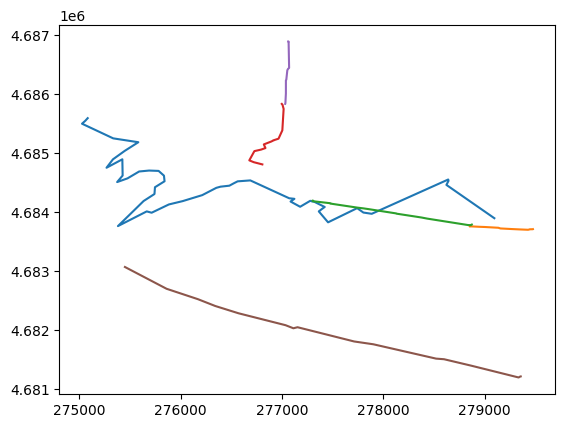

In [130]:
for traj in representative_trajectories:
    plt.plot(traj[:,0], traj[:,1])

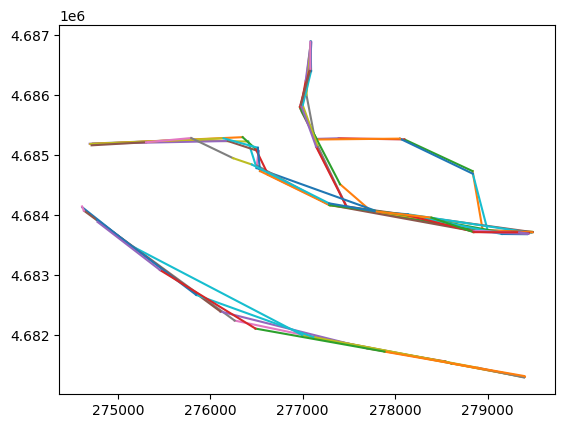

In [136]:
for traj in segments:
    plt.plot(traj[:,0], traj[:,1])